<a href="https://colab.research.google.com/github/fosky95/AA_PRACTICA1_GRUPO_9/blob/main/AA_PRACTICA1_GRUPO_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grupo 9

## Pedro García Silgo

## Carlos Ocón Garay

# INTRODUCCIÓN

Crear un modelo de Red de Neuronas para analizar y clasificar imágenes de ropa en distintas categorías (tipos de ropa:camisa, vestido, etc). Este modelo será definido, configurado, entrenado, evaluado y mejorado para después usarlo para realizar predicciones con otras imágenes que no ha visto nunca. Para ello se tendrá que crear un modelo en Keras aplicando de una tirada todos los pasos al conjunto de datos Fashion-MNIST, precargado en Keras. Fashion-MNIST es un conjunto de datos de las imágenes de los artículos de Zalando (www.zalando.com), una tienda de moda online alemana especializada en ventas de ropa y zapatos. El conjunto de datos contiene 70K imágenes en escala de grises en 10 categorías. Estas imágenes muestran prendas individuales de ropa en baja resolución (28 x 28 píxeles):

Para empezar con el problema, se importan todas las librerías:

# LIBRERIAS Y FUNCIONES

In [2]:
# Importar las librerías principales y nos aseguramos de que la versión de TensorFlow es superior a 2.0.0
import tensorflow as tf
from tensorflow import keras
print("La versión de TensorFlw es", tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))

# También importamos la librería matliblob para "pintar" las prendas de ropa
import matplotlib.pyplot as plt

# Se importan las librerías necesarias para crear la arquitectura de la red.
from keras import models
from keras import layers

# Para preparar las etiquetas:
from keras import utils
from keras.utils import to_categorical
from keras.utils.np_utils import to_categorical

# Importar las siguientes librería para la matriz de confusión
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np

# Importar funciones para mejorar la red neuronal
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

La versión de TensorFlw es 2.9.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


También dejamos las funciones de predicciones y de la matriz de confusión al principio para que no molesten durante el ejercicio.

In [3]:
#Funciones de predicciones y de pintar ropa
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [4]:
#Matriz de confusion
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')


# DATOS DEL PROBLEMA

Hemos comprobado que la versión es adecuada para seguir, pero no disponemos de ninguna GPU (en el momento que se realiza la importación) por lo tanto los procesos serán más tardíos.

A continuación cargamos los datos de zalando.

In [5]:
# CARGAMOS EL CONJUNTO DE DATOS DE ZALANDO
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
(train_images0, train_labels0), (test_images0, test_labels0) = (train_images, train_labels), (test_images, test_labels)

Hemos creado una segunda variable que no alteraremos para que podamos usar matplotlib sin problemas.

Podemos ver cuántas imágenes tenemos de la siguiente manera.

In [6]:
#Comprobamos forma de las imágenes 
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


Podemos ver que tenemos 60k imagenes de entrenamiento y 10k de test, ambos casos de 28x28 píxeles como hemos mencionado antes.

Si tuvieramos que hacer la red a ciegas, separariamos una pequeña parte de las imágenes de entrenamiento para trastear con las funciones de perdida y la matriz de confusión para averiguar las épocas, la función de activación, número de neuronas por capa... Pero como nos lo da la práctica, no tenemos que hacer eso.

Podemos ver una de las imágenes como ejemplo:

In [7]:
# Vemos la matriz de la imagen número 30 (28x28)
print(train_images0[30])
print('Prenda de ropa:',train_labels0[30], 'que equivale a la sandalia')

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

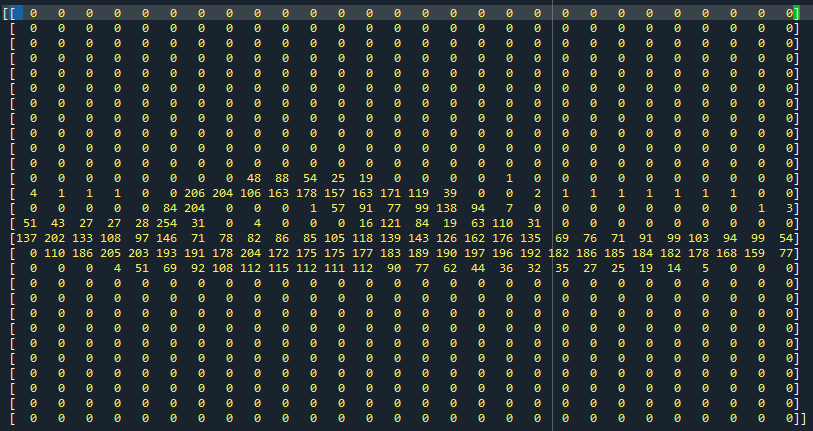

Tenemos que la imagen 31 (como la matriz empieza en 0, esta es la 31 aunque en la matriz es el numero 30) es una sandalia. Lo sabemos porque se puede distinguir una vez ponemos la matriz en orden y comprobamos que la etiqueta número 5 indica que es una sandalia.

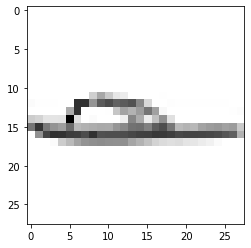

In [8]:
#Podemos usar matplotlib para pintar la prenda y comprobamos que es una sandalia/chancla:
imagen = train_images[30]
plt.imshow(imagen, cmap=plt.cm.binary)
plt.show()

Esta es una imagen de la sandalia con matplotlib

Y a cada una de las imágenes que hemos importado tienen asignada una etiqueta que indica qué prenda de ropa es cada imagen:

0.   Camiseta
1.   Pantalón
2.   Jersey
3.   Vestido
4.   Cazadora
5.   Sandalia
6.   Camisa
7.   Zapatillas
8.   Bolso
9.   Bota

Creamos un vector con las etiquetas en su correspondiente orden.


In [9]:
# Vector con las etiquetas
class_names = ['Camiseta', 'Pantalón', 'Jersey', 'Vestido', 'Cazadora', 'Sandalia', 'Camisa', 'Zapatilla', 'Bolso', 'Bota']

Ahora, se escalan los valores de entrada en el rango 0-1, es decir se normalizan, para que converja más rápido.

In [10]:
# PREPARAMOS LOS DATOS DE IMAGEN CON ALGUNA TRANSFORMACIÓN. NORMALIZACION
# Los tensores transformados tienen la misma cantidad de datos total que el 
# tensor inicial

# Imagenes de prueba
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255;
train_images, len(train_images), train_images.shape, train_images[1];

# Imagenes de test
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

# Etiquetas 
test_labels==test_labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_labels[1] # Posición 0 a 9 donde solo el 0 tiene probabilidad 1, porque estamos con la camiseta.

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

(Para las imágenes y las etiquetas hemos creado una variable que guarde las originales para que podamos usar el matplotlib porque con los valores normalizados no nos deja pintar)

Comprobamos que los datos tienen la forma y valores esperados:

In [11]:
print("train_images.shape:",train_images.shape)
print("len(train_labels):",len(train_labels))
print("test_images.shape:",test_images.shape)
print("len(test_labels):",len(test_labels))
train_labels

train_images.shape: (60000, 784)
len(train_labels): 60000
test_images.shape: (10000, 784)
len(test_labels): 10000


array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Una vez tenemos todos los datos, procedemos a realizar los modelos de los casos (para todos los casos, la función de pérdida será la "categorical_crossentropy", métrica de precisión y 5 épocas, por lo que no se parará a explicarse en cada caso):



# APARTADO 1. CONFIGURACIÓN Y ENTRENAR LOS MODELOS:

## Caso 1:

Para el caso 1 se piden 10 neuronas en la capa 1, función de activación relu y sgd de optimizador:

In [12]:
# El tipo de red será secuencial, por lo que, desde la entrada hasta la salida será sin ciclos, es decir, que será unidireccional (las neuronas posteriores no se conectaran con las anteriores en ese sentido)
network1 = models.Sequential(name='Modelo_Zalando')
# Creamos dos capas "Dense" (Neurona1 y Neurona2), que son capas neuronales densamente conectadas 
# (también llamadas "completamente conectadas"). Cada una de las X(en función del ejercicio) neuronas de
# la capa de entrada están conectadas con los 784 píxeles = 28*28 (las imágenes). Solo lo 
# definimos para la primera capa. Para la segunda capa y posteriores, Keras lo 
# deduce.
network1.add(layers.Dense(10, activation='relu', input_shape=(28*28,), name='Neurona1'))
# Capa de salida "softmax" de 10 vías (o neuronas). Significa que  
# devolverá una matriz de 10 puntuaciones de probabilidad (sumando 1)
# La puntuación será la probabilidad de que la imagen del dígito actual 
# pertenezca a una de nuestras clases de 10 dígitos.
network1.add(layers.Dense(10, activation='softmax', name='Neurona2'),)
# Cada capa aplica unas cuantas operaciones con tensores sencillas a los datos
# de entrada, y que estas operaciones implican tensores de pesos. Los tensores
# de peso, que son los atributos de las capas, son donde persiste el 
# "conocimiento" de la red.
# En general, la capa de salida de una red de clasificación tendrá tantas
# neuronas como clases, menos en la clasificación binaria, que con 1 vale. Cada 
# valor será la probabilidad de que la imagen del dígito actual pertenezca a cada
# una de las clases

In [13]:
# HACEMOS EL PASO DE COMPILACIÓN CARGANDO EL OPTIMIZADOR, LA FUNCIÓN DE PÉRDIDA Y LAS MÉTRICAS
network1.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [14]:
# Aqui simplemente comprobamos que las imagenes sean aceptables para el entrenamiento
print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


A continuación entrenamos el modelo con la función fit:

In [15]:
# ENTRENAMOS LA RED CON EL JUEGO DE DATOS DE ENTRENAMIENTO
# * epochs: Épocas: un límite arbitrario, definido como 
# "una pasada sobre todo el conjunto de datos", que se utiliza para 
# separar el entrenamiento en distintas fases, que es útil para el 
# registro y la evaluación periódica. Como no hay initial_epoch, en
# este caso va hasta la época 5 desde 1.
# tamaño del lote
# * batch_size: Entero o NULO. Número de muestras por actualización de gradiente. 
# Si no se especifica, batch_size se establecerá de forma predeterminada en 32.
network1.fit(train_images, train_labels, epochs=5, batch_size=32)
# La red empezará a iterar por lo datos de entrenamiento en minilotes de 32
# muestras, 5 veces (cada iteración por los datos de entrenamiento recibe el 
# nombre de "repetición"). En cada iteración, la red computará los gradientes de
# los pesos en relación con la pérdida en el lote y ajustará los pesos en
# consecuencia. Tras estas 5 repeticiones, la red habrá realizado 9375 ajustes
# de gradiente (1875 por repetición), la pérdida será lo bastante baja como para
# que la red sea capaz de clasificar números escritos a mano con gran exactitud.

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.8802 - accuracy: 0.6961
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5890 - accuracy: 0.8003
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5298 - accuracy: 0.8187
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4967 - accuracy: 0.8297
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4761 - accuracy: 0.8350


Ahora podemos hacer predicciones para los siguientes apartados:

In [16]:
# Predicción del modelo1
predictions1 = network1.predict(test_images)

313/313 [==============================] - 0s 1ms/step


## Caso 2:

Para el caso 2 se piden 10 neuronas en la capa 1, función de activación relu y rmsprop de optimizador. Además, hay un apartado donde nos indica que hay que entrenar con 25 épocas, por lo que lo más acertado sería crear 2 modelos para evitar un posible sobreentrenamiento o confusión. Ahora realizaremos el modelo con las 5 épocas.

In [17]:
# Creamos la red de neuronas
network21 = models.Sequential(name='Modelo_Zalando')
network21.add(layers.Dense(10, activation='relu', input_shape=(28*28,), name='Neurona1'))
network21.add(layers.Dense(10, activation='softmax', name='Neurona2'),)

In [18]:
# HACEMOS EL PASO DE COMPILACIÓN CARGANDO EL OPTIMIZADOR, LA FUNCIÓN DE PÉRDIDA Y LAS MÉTRICAS

network21.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


Y entrenamos el modelo

In [19]:
# Entrenamos el modelo
modelo21 = network21.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6644 - accuracy: 0.7788
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4809 - accuracy: 0.8343
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4475 - accuracy: 0.8446
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4302 - accuracy: 0.8506
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4176 - accuracy: 0.8540


Ahora hacemos las predicciones.

In [20]:
# Predicción del primer modelo
predictions21 = network21.predict(test_images)

313/313 [==============================] - 0s 1ms/step


## Caso 3:

Para el caso 3 se piden 10 neuronas en la capa 1, función de activación sigmoid y sgd de optimizador. Además, se pide que se mejore el modelo usando el optimizador 'ADAM' y la función de perdida 'sparse_categorical_crossentropy' por lo tanto, haremos de nuevo 2 modelos para que no haya confusiones como en el caso anterior, pero cada uno en su apartado.

Creamos el modelo

In [21]:
# Creamos el primer modelo de red de neuronas.
network31 = models.Sequential(name='Modelo_Zalando')
network31.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,), name='Neurona1'))
network31.add(layers.Dense(10, activation='softmax', name='Neurona2'),)

In [22]:
# HACEMOS EL PASO DE COMPILACIÓN CARGANDO EL OPTIMIZADOR, LA FUNCIÓN DE PÉRDIDA Y LAS MÉTRICAS
network31.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


Y entrenamos.

In [23]:
# Entrenamos el primer modelo
modelo31 = network31.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7827 - accuracy: 0.4866
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2576 - accuracy: 0.6482
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0197 - accuracy: 0.6924
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8897 - accuracy: 0.7139
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8079 - accuracy: 0.7305


Y hacemos las predicciones

In [24]:
# Predicciones del primer modelo
predictions31 = network31.predict(test_images)

313/313 [==============================] - 0s 1ms/step


## Caso 4

Para el caso 4 se piden 10 neuronas en la capa 1, función de activación sigmoid y rmsprop de optimizador. En este caso, solo debemos realizar un modelo a diferencia de los dos anteriores.

Algo que podemos adivinar antes de empezar es que el modelo puede tener fallos, como el primer modelo del caso 3 al usar esta función de activación. (puede ser que no sea asi, porque usa otro optimizador)

Vamos a crear la red neuronal

In [25]:
# Creamos la red de neuronas
network4 = models.Sequential(name='Modelo_Zalando')
network4.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,), name='Neurona1'))
network4.add(layers.Dense(10, activation='softmax', name='Neurona2'),)

In [26]:
# HACEMOS EL PASO DE COMPILACIÓN CARGANDO EL OPTIMIZADOR, LA FUNCIÓN DE PÉRDIDA Y LAS MÉTRICAS

network4.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


Entrenamos.

In [27]:
# Entrenamos el modelo
modelo4 = network4.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0135 - accuracy: 0.7189
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5556 - accuracy: 0.8133
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4789 - accuracy: 0.8353
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4485 - accuracy: 0.8439
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4310 - accuracy: 0.8503


Y predecimos.

In [28]:
# Predicción del primer modelo
predictions4 = network4.predict(test_images)

313/313 [==============================] - 0s 1ms/step


## Caso 5

Para el caso 5 ya nos piden cambiar el numero de neuronas de la primera . Usaremos la función de activación relu y el optimizador sgd

Creamos la red de neuronas.

In [29]:
# Creamos la red de neuronas
network5 = models.Sequential(name='Modelo_Zalando')
network5.add(layers.Dense(512, activation='relu', input_shape=(28*28,), name='Neurona1'))
network5.add(layers.Dense(10, activation='softmax', name='Neurona2'),)


In [30]:
# HACEMOS EL PASO DE COMPILACIÓN CARGANDO EL OPTIMIZADOR, LA FUNCIÓN DE PÉRDIDA Y LAS MÉTRICAS

network5.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


Entrenamos el modelo.

In [31]:
# Entrenamos el modelo
modelo5 = network5.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7097 - accuracy: 0.7724
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4972 - accuracy: 0.8321
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4548 - accuracy: 0.8446
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4294 - accuracy: 0.8540
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4116 - accuracy: 0.8581


Y hacemos las predicciones

In [32]:
# Predicción del primer modelo
predictions5 = network5.predict(test_images)

313/313 [==============================] - 0s 1ms/step


## Caso 6:

Para el caso 6, cambiamos, con respecto al caso anterior, el optimizador. En este caso volveremos a usar rmsprop.

Creamos el modelo

In [33]:
# Creamos la red de neuronas
network6 = models.Sequential(name='Modelo_Zalando')
network6.add(layers.Dense(512, activation='relu', input_shape=(28*28,), name='Neurona1'))
network6.add(layers.Dense(10, activation='softmax', name='Neurona2'),)


In [34]:
# HACEMOS EL PASO DE COMPILACIÓN CARGANDO EL OPTIMIZADOR, LA FUNCIÓN DE PÉRDIDA Y LAS MÉTRICAS

network6.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


Entrenamos

In [35]:
# Entrenamos el modelo
modelo6 = network6.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4970 - accuracy: 0.8230
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3821 - accuracy: 0.8654
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3555 - accuracy: 0.8775
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3398 - accuracy: 0.8843
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3292 - accuracy: 0.8887


Y realizamos las predicciones.

In [36]:
# Predicción del primer modelo
predictions6 = network6.predict(test_images)

313/313 [==============================] - 0s 1ms/step


## Caso 7:

En este caso usaremos el optimizador sgd y la función de activación sigmoid. Ademas, como en el caso 2, se nos pide hacer otro entrenamiento con 25 épocas, por lo que haremos de nuevo 2 modelos.

Pero ahora solo realizaremos el de las 5 épocas.

In [37]:
# Creamos la red de neuronas
network71 = models.Sequential(name='Modelo_Zalando')
network71.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,), name='Neurona1'))
network71.add(layers.Dense(10, activation='softmax', name='Neurona2'),)


In [38]:
# HACEMOS EL PASO DE COMPILACIÓN CARGANDO EL OPTIMIZADOR, LA FUNCIÓN DE PÉRDIDA Y LAS MÉTRICAS

network71.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


Entrenamos

In [39]:
# Entrenamos el modelo
modelo71 = network71.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.1531 - accuracy: 0.6763
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7123 - accuracy: 0.7607
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6245 - accuracy: 0.7836
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5782 - accuracy: 0.7994
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5480 - accuracy: 0.8093


Y predecimos

In [40]:
# Predicción del primer modelo
predictions71 = network71.predict(test_images)

313/313 [==============================] - 0s 1ms/step


## Caso 8

Para el caso 8 usamos la función sigmoidea y el optimizador rmsprop.

In [41]:
# Creamos la red de neuronas
network8 = models.Sequential(name='Modelo_Zalando')
network8.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,), name='Neurona1'))
network8.add(layers.Dense(10, activation='softmax', name='Neurona2'),)


In [42]:
# HACEMOS EL PASO DE COMPILACIÓN CARGANDO EL OPTIMIZADOR, LA FUNCIÓN DE PÉRDIDA Y LAS MÉTRICAS

network8.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


Realizamos el entrenamiento

In [43]:
# Entrenamos el modelo
modelo8 = network8.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5069 - accuracy: 0.8153
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3830 - accuracy: 0.8608
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3455 - accuracy: 0.8752
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3201 - accuracy: 0.8835
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3015 - accuracy: 0.8916


Y predecimos

In [44]:
# Predicción del primer modelo
predictions8 = network8.predict(test_images)

313/313 [==============================] - 1s 1ms/step


# APARTADO 2. EXPLICAR LA SALIDA *model.summary()*:

Utilizamos la función summary para poder ver con mas detalle las redes creadas. Dentro de esta función podremos ver

1. Las capas del modelo.
2. El tipo de out que obtenemos.
3. Los parámetros de cada una de las capas.
4. Los parámetros totales de la red.

In [45]:
# Model summary del caso 1
print("Model summary del caso 1")
network1.summary()

print('---------------------------')
print('')
print('')
# Model summary del caso 2
print("Model summary del caso 2")
network21.summary()

print('---------------------------')
print('')
print('')

# Model summary del caso 3
print("Model summary del caso 3")
network31.summary()

print('---------------------------')
print('')
print('')

# Model summary del caso 4
print("Model summary del caso 4")
network4.summary()

print('---------------------------')
print('')
print('')

# Model summary del caso 5
print("Model summary del caso 5")
network5.summary()

print('---------------------------')
print('')
print('')

# Model summary del caso 6
print("Model summary del caso 6")
network6.summary()

print('---------------------------')
print('')
print('')

# Model summary del caso 7
print("Model summary del caso 7")
network71.summary()

print('---------------------------')
print('')
print('')

# Model summary del caso 8
print("Model summary del caso 8")
network8.summary()

print('---------------------------')


Model summary del caso 1
Model: "Modelo_Zalando"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Neurona1 (Dense)            (None, 10)                7850      
                                                                 
 Neurona2 (Dense)            (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________
---------------------------


Model summary del caso 2
Model: "Modelo_Zalando"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Neurona1 (Dense)            (None, 10)                7850      
                                                                 
 Neurona2 (Dense)            (None, 10)                110       
            

Al visualizar los *model.summary()* de los modelos podemos obtener dos tipos de modelos (en función de la cantidad de neuronas que hay en la primera capa.

* El primer tipo de modelo es el que tiene 10 neuronas. En este caso aparecen 7960 parámetros totales que se obtiene al sumar los parámetros de ambas capas. La primera son 7850 que se obtiene de 28x28=784 (el numero de píxeles por imagen), 784x10= 7840 (se multiplican por el numero de neuronas) y se vuelven a sumar otra vez las 10 neuronas: 7840+10=7850. La segunda capa se obtiene de 10x10 +10 (el nñumero de respuestas que tenemos y neuronas de la segunda capa:10). Por lo que 7960 = 110+7840

* Para el segundo tipo de modelo con 512 neuronas, obtenemos 407050 parámetros totales. En la primera capa (por el mismo cálculo anterior) tenemos 401920 y en la segunda 5130.



**Hemos decidido cambiar los apartados 3 y 4, porque para realizar el apartado de las 25 épocas, necesitas la evaluación de los originales que se hacen en el apartado 4**

# APARTADO 4. EVUALUACIÓN DE MODELOS

Una vez hechas las predicciones de cada caso podemos realizar las evaluaciones usando *evaluate()*.

## Caso 1:

In [46]:
# VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss1, test_acc1 = network1.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.5061 - accuracy: 0.8228


In [47]:
# Miramos la precisión del test
print('Precisión del test 1:', test_acc1)
print('Pérdida del test 1:', test_loss1)

Precisión del test 1: 0.8227999806404114
Pérdida del test 1: 0.5061476230621338


Ahora realizaremos la matriz de confusión para ver los resultados mejor. Para ello definimos la función que la genera:

313/313 [==============================] - 0s 1ms/step


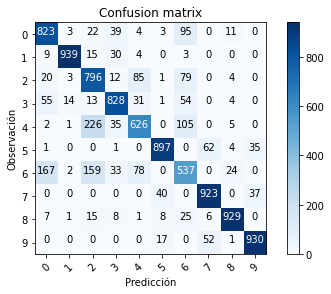

In [48]:
# Predecimos los valores y los convertimos para encajarlo en la matriz de confusion
Y_pred1 = network1.predict(test_images) 
Y_pred_classes1 = np.argmax(Y_pred1, axis = 1) 
Y_true1 = np.argmax(test_labels, axis = 1) 
# Computamos la matriz de confusion con las predicciones y los valores reales
confusion_mtx1 = confusion_matrix(Y_true1, Y_pred_classes1) 
# Pintamos la matriz de confusión
plot_confusion_matrix(confusion_mtx1, classes = range(10))

En la matriz de confusión se pueden apreciar la cantidad de veces que ha hacertado la RNA (la diagonal de la matriz) y la cantidad de veces que ha fallado con otra prenda distinta. Por ejemplo, de la prenda 9 ha hacertado 920 veces, pero ha habido 1 caso que se pensaba que era la prenda 4, 18 en los que pensaba que era la 5 y 32 en los que se pensaba que era la 7.

En el caso de la prenda 6 ha sido la que menos ha hacertado. Se trata de la camisa y el modelo la ha confundido más con los jerseys y las cazadoras que, a la vista de las imágenes de 28*28 píxeles puede confundir.

(estos números pueden cambiar en el momento que se reinicia y se ejecuta otro entrenamiento, pero los números rondaran por el mismo espectro de resultados)

## Caso 2:

In [49]:
# VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss21, test_acc21 = network21.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4801 - accuracy: 0.8349


In [50]:
# Miramos las precisiones de cada test para compararlos
print('Precisión del test 2.1:', test_acc21)
# Comprobamos la pérdida
print('Pérdida del test 2.1:', test_loss21)

Precisión del test 2.1: 0.8349000215530396
Pérdida del test 2.1: 0.48011139035224915


Ahora hacemos la matriz de confusión

313/313 [==============================] - 0s 1ms/step


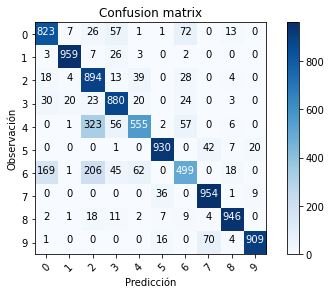

In [51]:
# Predecimos los valores y los convertimos para encajarlo en la matriz de confusion
Y_pred21 = network21.predict(test_images) 
Y_pred_classes21 = np.argmax(Y_pred21, axis = 1) 
Y_true21 = np.argmax(test_labels, axis = 1) 
# Computamos la matriz de confusion con las predicciones y los valores reales
confusion_mtx21 = confusion_matrix(Y_true21, Y_pred_classes21) 
# Pintamos la matriz de confusión
plot_confusion_matrix(confusion_mtx21, classes = range(10))

Podemos ver en esta segunda matriz un parecido con la primera. En general, las prendas de ropa son acertadas por el modelo, pero el caso de la camisa no llega al 50% de acierto.

A su vez, podemos ver que las botas, los pantalones, los bolsos y las zapatillas son las prenas que más aciertos tienen.

## Caso 3

In [52]:
# VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss31, test_acc31 = network31.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.7903 - accuracy: 0.7329


In [53]:
# Precisión y pérdida del primer modelo
print('Precisión del test 3:', test_acc31)
print('Pérdida del test 3:', test_loss31)

Precisión del test 3: 0.7329000234603882
Pérdida del test 3: 0.7902593016624451


Y realizamos de nuevo la matriz de confusión.

313/313 [==============================] - 1s 2ms/step


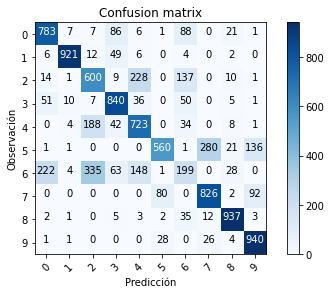

In [54]:
# Predecimos los valores y los convertimos para encajarlo en la matriz de confusion
Y_pred31 = network31.predict(test_images) 
Y_pred_classes31 = np.argmax(Y_pred31, axis = 1) 
Y_true31 = np.argmax(test_labels, axis = 1) 
# Computamos la matriz de confusion con las predicciones y los valores reales
confusion_mtx31 = confusion_matrix(Y_true31, Y_pred_classes31) 
# Pintamos la matriz de confusión
plot_confusion_matrix(confusion_mtx31, classes = range(10))

En este caso, el acertado de camisas cae considerablemente, por lo que podemos deducir que este modelo será malo prediciendo camisas y podemos buscar cual ha sido la causa de este declieve. 

Podemos ver que uno de los cambios ha sido usar la función de activación sigmoid. Puede ser que tenga que ver, para ello comprobamos el resto de casos.

## Caso 4:

In [55]:
# VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss4, test_acc4 = network4.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4603 - accuracy: 0.8440


In [56]:
# Precisión y pérdida del primer modelo
print('Precisión del test 4:', test_acc4)
print('Pérdida del test 4:', test_loss4)

Precisión del test 4: 0.843999981880188
Pérdida del test 4: 0.46028852462768555


Y la matriz de confusión es la siguiente.

313/313 [==============================] - 0s 1ms/step


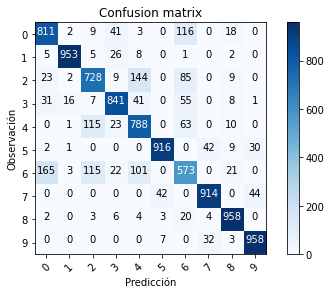

In [57]:
# Predecimos los valores y los convertimos para encajarlo en la matriz de confusion
Y_pred4 = network4.predict(test_images) 
Y_pred_classes4 = np.argmax(Y_pred4, axis = 1) 
Y_true4 = np.argmax(test_labels, axis = 1) 
# Computamos la matriz de confusion con las predicciones y los valores reales
confusion_mtx4 = confusion_matrix(Y_true4, Y_pred_classes4) 
# Pintamos la matriz de confusión
plot_confusion_matrix(confusion_mtx4, classes = range(10))

Para nuestra sorpresa, el valor de aciertos de las prendas (sobretodo el de las camisas) ha aumentado considerablemente Puede ser que el optimizador corrija bien los problemas que supone la función de activación sigmoid.

## Caso 5:

Aqui empiezan los modelos con 512 neuronas en la primera capa. Veamos si encontramos diferencias.

In [58]:
# VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss5, test_acc5 = network5.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4460 - accuracy: 0.8414


In [59]:
# Precisión y pérdida del primer modelo
print('Precisión del test 5:', test_acc5)
print('Pérdida del test 5:', test_loss5)

Precisión del test 5: 0.8414000272750854
Pérdida del test 5: 0.4459783732891083


Ahora veamos la matriz de confusión

313/313 [==============================] - 0s 2ms/step


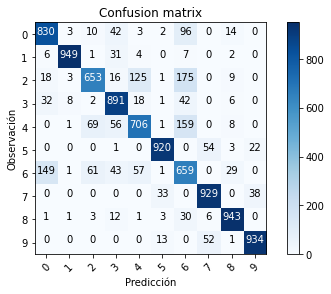

In [60]:
# Predecimos los valores y los convertimos para encajarlo en la matriz de confusion
Y_pred5 = network5.predict(test_images) 
Y_pred_classes5 = np.argmax(Y_pred5, axis = 1) 
Y_true5 = np.argmax(test_labels, axis = 1) 
# Computamos la matriz de confusion con las predicciones y los valores reales
confusion_mtx5 = confusion_matrix(Y_true5, Y_pred_classes5) 
# Pintamos la matriz de confusión
plot_confusion_matrix(confusion_mtx5, classes = range(10))

Este caso se debería comprobar con el caso 1, que es identico salvo por el número de neuronas. Vemos que este acierta más con las camisas y ligeramente más con el resto de prendas.

## Caso 6:

In [61]:
# VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss6, test_acc6 = network6.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4369 - accuracy: 0.8665


In [62]:
# Precisión y pérdida del primer modelo
print('Precisión del test 6:', test_acc6)
print('Pérdida del test 6:', test_loss6)

Precisión del test 6: 0.8665000200271606
Pérdida del test 6: 0.4368915557861328


Y hacemos la matriz de nuevo.

313/313 [==============================] - 0s 2ms/step


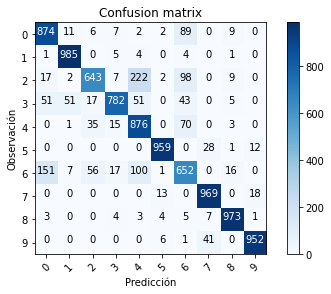

In [63]:
# Predecimos los valores y los convertimos para encajarlo en la matriz de confusion
Y_pred6 = network6.predict(test_images) 
Y_pred_classes6 = np.argmax(Y_pred6, axis = 1) 
Y_true6 = np.argmax(test_labels, axis = 1) 
# Computamos la matriz de confusion con las predicciones y los valores reales
confusion_mtx6 = confusion_matrix(Y_true6, Y_pred_classes6) 
# Pintamos la matriz de confusión
plot_confusion_matrix(confusion_mtx6, classes = range(10))

Cada vez vemos que las camisas se aciertan mas, algo que es muy bueno. Pero la prenda 4 (la cazadora) baja su ratio de aciertos. Para la generalidad, preferimos que se acierten todas que una pero perfecto (en este modelo)

## Caso 7:

In [64]:
# VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss71, test_acc71 = network71.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.5582 - accuracy: 0.8013


In [65]:
# Precisión y pérdida del primer modelo
print('Precisión del test 7.1:', test_acc71)
print('Pérdida del test 7.1:', test_loss71)

Precisión del test 7.1: 0.8012999892234802
Pérdida del test 7.1: 0.5581682920455933


Y la matriz de confusion:

313/313 [==============================] - 0s 1ms/step


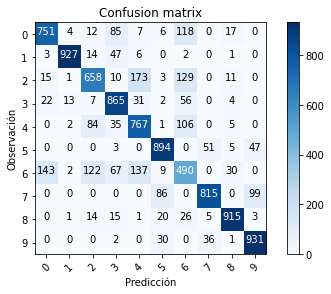

In [66]:
# Predecimos los valores y los convertimos para encajarlo en la matriz de confusion
Y_pred71 = network71.predict(test_images) 
Y_pred_classes71 = np.argmax(Y_pred71, axis = 1) 
Y_true71 = np.argmax(test_labels, axis = 1) 
# Computamos la matriz de confusion con las predicciones y los valores reales
confusion_mtx71 = confusion_matrix(Y_true71, Y_pred_classes71) 
# Pintamos la matriz de confusión
plot_confusion_matrix(confusion_mtx71, classes = range(10))

Podemos ver que ha empeorado en comparación con la matriz anterior, pero esperabamos esto. En el caso 7 se ha usado la función de actiavción sigmoid, que antes hemos visto que no funciona correctamente sin el optimizador rmsprop, que veremos en el caso anterior.

## Caso 8:

In [67]:
# VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss8, test_acc8 = network8.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3650 - accuracy: 0.8721


In [68]:
# Precisión y pérdida del primer modelo
print('Precisión del test 8:', test_acc8)
print('Pérdida del test 8:', test_loss8)

Precisión del test 8: 0.8720999956130981
Pérdida del test 8: 0.36499205231666565


Y la última matriz de confusión de este apartado.

313/313 [==============================] - 0s 1ms/step


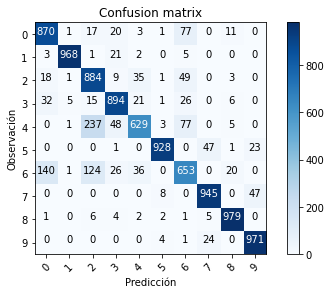

In [69]:
# Predecimos los valores y los convertimos para encajarlo en la matriz de confusion
Y_pred8 = network8.predict(test_images) 
Y_pred_classes8 = np.argmax(Y_pred8, axis = 1) 
Y_true8 = np.argmax(test_labels, axis = 1) 
# Computamos la matriz de confusion con las predicciones y los valores reales
confusion_mtx8 = confusion_matrix(Y_true8, Y_pred_classes8) 
# Pintamos la matriz de confusión
plot_confusion_matrix(confusion_mtx8, classes = range(10))

Como esperábamos, la precisión de aciertos de las prendas aumenta al cambiar el optimizador si se compara con el caso anterior.

## Conclusión de la evaluación

Ahora podemos comprobar cuál ha sido el modelo más eficaz.

In [70]:
# Precisión de todos los test
print(test_acc1)
print(test_acc21)
print(test_acc31)
print(test_acc4)
print(test_acc5)
print(test_acc6)
print(test_acc71)
print(test_acc8)

0.8227999806404114
0.8349000215530396
0.7329000234603882
0.843999981880188
0.8414000272750854
0.8665000200271606
0.8012999892234802
0.8720999956130981


Los modelos que mejores valores han dado han sido el **5** y el **6**. Era de esperar porque ya hemos dicho que la función sigmoid no es buena para este ejercicio. Además, podemos ver que al haber añadido más neuronas a la primera capa de la red ha aumentado el acierto de casi todos los casos, por lo que era de esperar este resultado

# APARTADO 3. EVALUAR CASOS 2 Y 7 CON 25 ÉPOCAS:

A continuación crearemos otro modelo como hemos dicho antes, solo que a este le daremos 25 épocas en vez de 5 para los casos 2 y 7

## Caso 2.2

Creamos la red de neuronas

In [71]:
# Creamos la red de neuronas igual que el anterior.
network22 = models.Sequential(name='Modelo_Zalando')
network22.add(layers.Dense(10, activation='relu', input_shape=(28*28,), name='Neurona1'))
network22.add(layers.Dense(10, activation='softmax', name='Neurona2'),)

In [72]:
# HACEMOS EL PASO DE COMPILACIÓN CARGANDO EL OPTIMIZADOR, LA FUNCIÓN DE PÉRDIDA Y LAS MÉTRICAS

network22.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Entrenamos.

In [73]:
# Entrenamos el modelo. Aquí es donde le metemos el cambio de las 25 épocas
modelo22 = network22.fit(train_images, train_labels, epochs=25, batch_size=32)

Epoch 1/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6338 - accuracy: 0.7830
Epoch 2/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4689 - accuracy: 0.8364
Epoch 3/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4423 - accuracy: 0.8471
Epoch 4/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4240 - accuracy: 0.8525
Epoch 5/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4126 - accuracy: 0.8563
Epoch 6/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4055 - accuracy: 0.8594
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3982 - accuracy: 0.8612
Epoch 8/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3935 - accuracy: 0.8628
Epoch 9/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3894 - accuracy: 0.8630
Epoch 10/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.384

También realizamos la predicción

In [74]:
# Realizamos la predicción
predictions22 = network22.predict(test_images)

313/313 [==============================] - 0s 1ms/step


A continuación evaluamos el modelo y lo comparamos con el anterior.



In [75]:
# VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss22, test_acc22 = network22.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4482 - accuracy: 0.8503


Y miramos qué precisiones han tenido (hay que comprobar el sobreentrenamiento del segundo modelo porque parece que ha habido):

In [76]:
# Miramos las precisiones de cada test para compararlos
print('Precisión del test 1:', test_acc21)
print('Precisión del test 2:', test_acc22)

Precisión del test 1: 0.8349000215530396
Precisión del test 2: 0.8503000140190125


A juzgar por las precisiones, el segundo modelo tiene más precisión. Pero a pesar de haberse repetido 20 veces más, solo ha aumentado un 1% la precisión. Si vemos el modelo de precisión siguiente veremos como se ha entrenado:

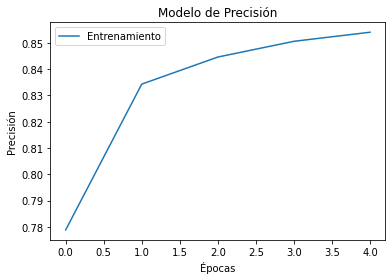

In [77]:
# Plot accuracy graph
plt.plot(modelo21.history['accuracy'])
plt.title('Modelo de Precisión')
plt.ylabel('Precisión')
plt.xlabel('Épocas')
plt.legend(['Entrenamiento'], loc='upper left')
plt.show()

Con la gráfica vemos que el entrenamiento transcurre con normalidad en las épocas correspondientes. Pero veamos el caso 2.

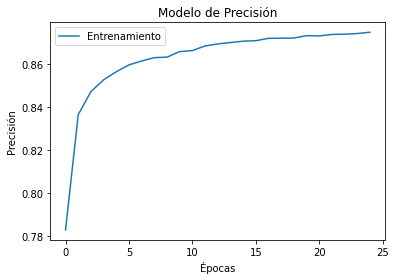

In [78]:
# Plot accuracy graph
plt.plot(modelo22.history['accuracy'])
plt.title('Modelo de Precisión')
plt.ylabel('Precisión')
plt.xlabel('Épocas')
plt.legend(['Entrenamiento'], loc='upper left')
plt.show()

En esta segunda gráfica observamos que, a pesar de aumentar en 20 las épocas, la precisión no aumenta mucho más. Además, entrenando mucho tendremos sobreentrenamiento y perderemos generalidad para el test. Veremos en las predicciones que esto será asi.

Para este caso, también nos interesa ver la pérdida que tenemos en ambos casos (como hemos hecho tantas iteraciones en el segundo modelo podríamos tener perdidas):

In [79]:
# Comprobamos la pérdida
print('Pérdida del test 2.1:', test_loss21)
print('Pérdida del test 2.2:', test_loss22)

Pérdida del test 1: 0.48011139035224915
Pérdida del test 2: 0.448227196931839


Como podemos observar, en el segundo modelo tenemos más pérdida que en el primero. Esto se debe al sobreentrenamiento y puede causar que el programa no reconozca bien nuevas imágenes.

Viendo esto, procedemos a ver las matrices de confusión.

313/313 [==============================] - 0s 1ms/step


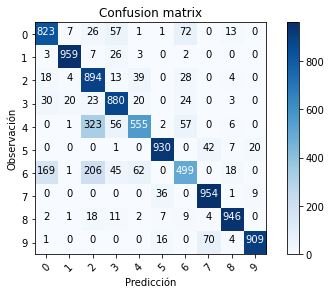

In [80]:
# Predecimos los valores y los convertimos para encajarlo en la matriz de confusion
Y_pred21 = network21.predict(test_images) 
Y_pred_classes21 = np.argmax(Y_pred21, axis = 1) 
Y_true21 = np.argmax(test_labels, axis = 1) 
# Computamos la matriz de confusion con las predicciones y los valores reales
confusion_mtx21 = confusion_matrix(Y_true21, Y_pred_classes21) 
# Pintamos la matriz de confusión
plot_confusion_matrix(confusion_mtx21, classes = range(10))

313/313 [==============================] - 0s 1ms/step


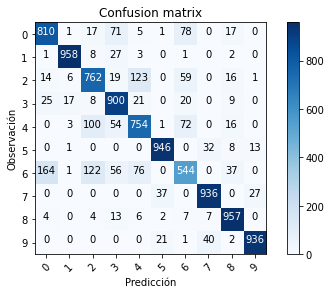

In [81]:
# Predecimos los valores y los convertimos para encajarlo en la matriz de confusion
Y_pred22 = network22.predict(test_images) 
Y_pred_classes22 = np.argmax(Y_pred22, axis = 1) 
Y_true22 = np.argmax(test_labels, axis = 1) 
# Computamos la matriz de confusion con las predicciones y los valores reales
confusion_mtx22 = confusion_matrix(Y_true22, Y_pred_classes22) 
# Pintamos la matriz de confusión
plot_confusion_matrix(confusion_mtx22, classes = range(10))

Podemos observar que en la segunda matriz, a pesar de tener más épocas, hay prendas en los que se confunde más que el primer modelo. Por lo que podemos deducir que a veces más épocas no es mejor.

A parte, comparando con el caso 1, los resultados se mantienen más o menos igual.

Las prendas de ropa que más acierta son los pantalones, las botas, los bolsos y las zapatillas.

## Caso 7.2

In [82]:
# Creamos la red de neuronas igual que el anterior.
network72 = models.Sequential(name='Modelo_Zalando')
network72.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,), name='Neurona1'))
network72.add(layers.Dense(10, activation='softmax', name='Neurona2'),)

In [83]:
# HACEMOS EL PASO DE COMPILACIÓN CARGANDO EL OPTIMIZADOR, LA FUNCIÓN DE PÉRDIDA Y LAS MÉTRICAS

network72.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Entrenamos.

In [84]:
# Entrenamos el modelo. Aquí es donde le metemos el cambio de las 25 épocas
modelo72 = network72.fit(train_images, train_labels, epochs=25, batch_size=32)

Epoch 1/25
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1481 - accuracy: 0.6784
Epoch 2/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7133 - accuracy: 0.7589
Epoch 3/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6260 - accuracy: 0.7842
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5795 - accuracy: 0.7978
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5484 - accuracy: 0.8095
Epoch 6/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5262 - accuracy: 0.8163
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5096 - accuracy: 0.8223
Epoch 8/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4970 - accuracy: 0.8261
Epoch 9/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4861 - accuracy: 0.8306
Epoch 10/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.477

También realizamos la predicción

In [85]:
# Realizamos la predicción
predictions72 = network72.predict(test_images)

313/313 [==============================] - 0s 1ms/step


A continuación evaluamos el modelo y lo comparamos con el anterior.



In [86]:
# VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss72, test_acc72 = network72.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4507 - accuracy: 0.8370


Y miramos qué precisiones han tenido (hay que comprobar el sobreentrenamiento del segundo modelo porque parece que ha habido):

In [87]:
# Miramos las precisiones de cada test para compararlos
print('Precisión del test 7.1:', test_acc71)
print('Precisión del test 7.2:', test_acc72)

Precisión del test 7.1: 0.8012999892234802
Precisión del test 7.2: 0.8370000123977661


A juzgar por las precisiones, el segundo modelo tiene más precisión. Pero a pesar de haberse repetido 20 veces más, solo ha aumentado un 1% la precisión. Si vemos el modelo de precisión siguiente veremos como se ha entrenado:

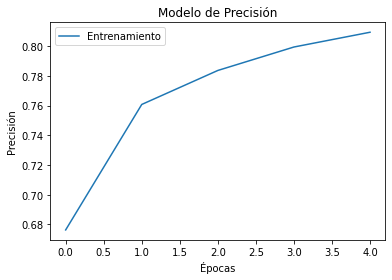

In [88]:
# Plot accuracy graph
plt.plot(modelo71.history['accuracy'])
plt.title('Modelo de Precisión')
plt.ylabel('Precisión')
plt.xlabel('Épocas')
plt.legend(['Entrenamiento'], loc='upper left')
plt.show()

Con la gráfica vemos que el entrenamiento transcurre con normalidad en las épocas correspondientes. Pero veamos el caso 2.

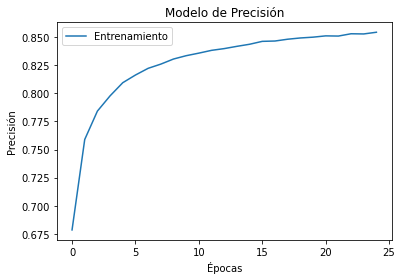

In [89]:
# Plot accuracy graph
plt.plot(modelo72.history['accuracy'])
plt.title('Modelo de Precisión')
plt.ylabel('Precisión')
plt.xlabel('Épocas')
plt.legend(['Entrenamiento'], loc='upper left')
plt.show()

En esta segunda gráfica observamos que, a pesar de aumentar en 20 las épocas, la precisión no aumenta mucho más. Además, entrenando mucho tendremos sobreentrenamiento y perderemos generalidad para el test. Veremos en las predicciones que esto será asi.

Para este caso, también nos interesa ver la pérdida que tenemos en ambos casos (como hemos hecho tantas iteraciones en el segundo modelo podríamos tener perdidas):

In [90]:
# Comprobamos la pérdida
print('Pérdida del test 7.1:', test_loss71)
print('Pérdida del test 7.2:', test_loss72)

Pérdida del test 7.1: 0.5581682920455933
Pérdida del test 7.2: 0.45065394043922424


En este caso, es el primer modelo el que tiene más pérdida. Probablemente se deba al numero de neuronas de la primera capa.

Veamos como se refleja en las matrices de confusión

313/313 [==============================] - 0s 1ms/step


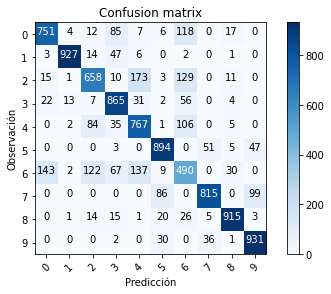

In [91]:
# Predecimos los valores y los convertimos para encajarlo en la matriz de confusion
Y_pred71 = network71.predict(test_images) 
Y_pred_classes71 = np.argmax(Y_pred71, axis = 1) 
Y_true71 = np.argmax(test_labels, axis = 1) 
# Computamos la matriz de confusion con las predicciones y los valores reales
confusion_mtx71 = confusion_matrix(Y_true71, Y_pred_classes71) 
# Pintamos la matriz de confusión
plot_confusion_matrix(confusion_mtx71, classes = range(10))

313/313 [==============================] - 0s 1ms/step


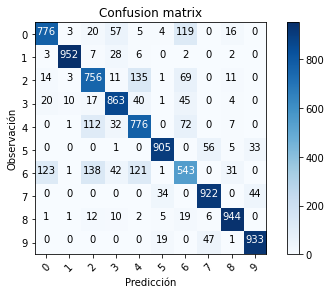

In [92]:
# Predecimos los valores y los convertimos para encajarlo en la matriz de confusion
Y_pred72 = network72.predict(test_images) 
Y_pred_classes72 = np.argmax(Y_pred72, axis = 1) 
Y_true72 = np.argmax(test_labels, axis = 1) 
# Computamos la matriz de confusion con las predicciones y los valores reales
confusion_mtx72 = confusion_matrix(Y_true72, Y_pred_classes72) 
# Pintamos la matriz de confusión
plot_confusion_matrix(confusion_mtx72, classes = range(10))

Podemos observar que al tener más neuronas, no se pierde tanta información como en el caso 2. Aun así, perdemos muchos recursos al realizar tantas iteraciones para conseguir un pequeño porcentaje de acierto más.

Las prendas de ropa que más acierta son los pantalones, las botas, los bolsos y las zapatillas (aunque esto es algo que pasará en todos los casos)

# APARTADO 5. PREDICCIÓN DE LA 6º IMAGEN

In [93]:
# Predicción de todos los modelos
print('Predicción del modelo 1:', class_names[np.argmax(predictions1[5])])
print('Predicción del modelo 2:', class_names[np.argmax(predictions21[5])])
print('Predicción del modelo 3:', class_names[np.argmax(predictions31[5])])
print('Predicción del modelo 4:', class_names[np.argmax(predictions4[5])])
print('Predicción del modelo 5:', class_names[np.argmax(predictions5[5])])
print('Predicción del modelo 6:', class_names[np.argmax(predictions6[5])])
print('Predicción del modelo 7:', class_names[np.argmax(predictions71[5])])
print('Predicción del modelo 8:', class_names[np.argmax(predictions8[5])])

Predicción del modelo 1: Pantalón
Predicción del modelo 2: Pantalón
Predicción del modelo 3: Pantalón
Predicción del modelo 4: Pantalón
Predicción del modelo 5: Pantalón
Predicción del modelo 6: Pantalón
Predicción del modelo 7: Pantalón
Predicción del modelo 8: Pantalón


Vemos que en todos los casos, predice bien el pantalón. Pero como venimos diciendo, no es algo que nos impacte debido a que los pantalones es una de las prendas que tiene menos error.

# APARTADO 6. GRAFICAR 10 PRIMERAS IMÁGENES Y COMPROBAR EL RESULTADO

## Caso 1:

Predicción  1 :


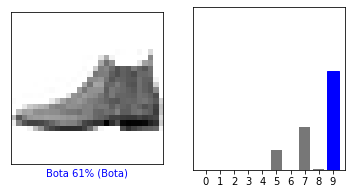

Predicción  2 :


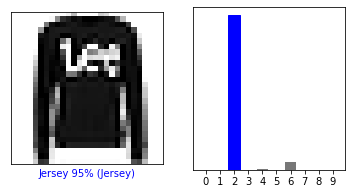

Predicción  3 :


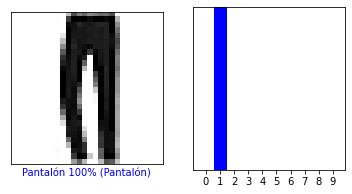

Predicción  4 :


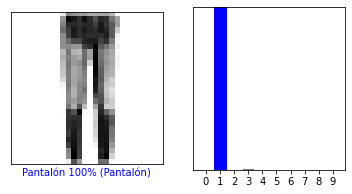

Predicción  5 :


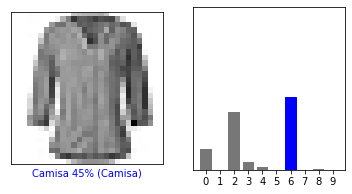

Predicción  6 :


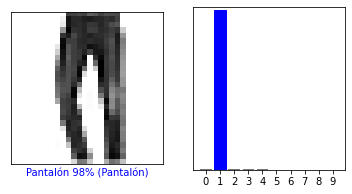

Predicción  7 :


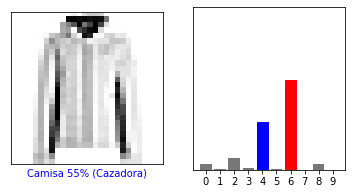

Predicción  8 :


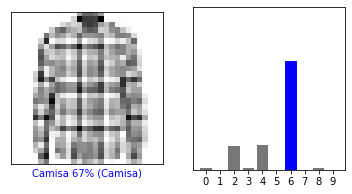

Predicción  9 :


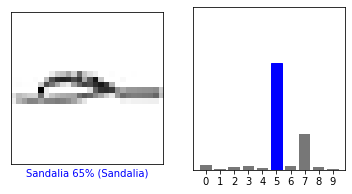

Predicción  10 :


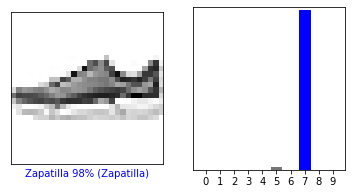

In [94]:
# Predicciones y pintar las 10 primeras prendas del primer modelo
for i in range(10):
  print("Predicción ", i+1, ":")
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions1[i], test_labels0, test_images0)
  plt.subplot(1,2,2)
  plot_value_array(i, predictions1[i], test_labels0)
  plt.show()

## Caso 2:

Predicción  1 :


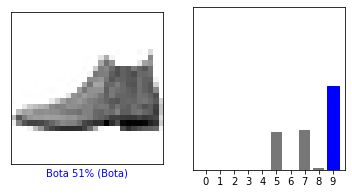

Predicción  2 :


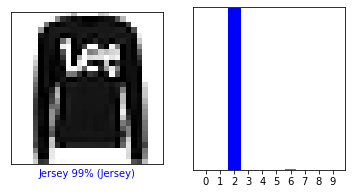

Predicción  3 :


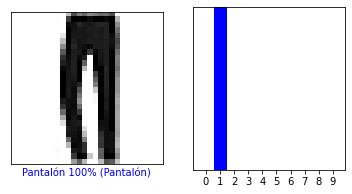

Predicción  4 :


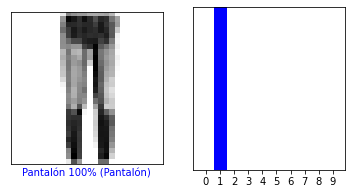

Predicción  5 :


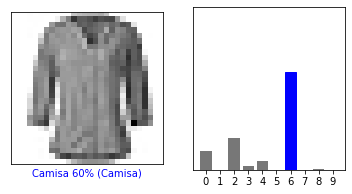

Predicción  6 :


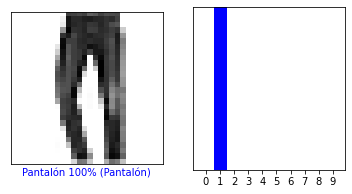

Predicción  7 :


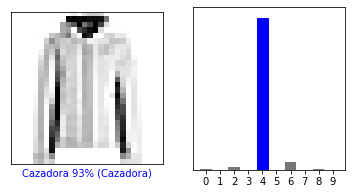

Predicción  8 :


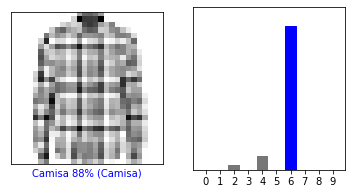

Predicción  9 :


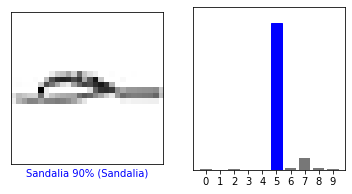

Predicción  10 :


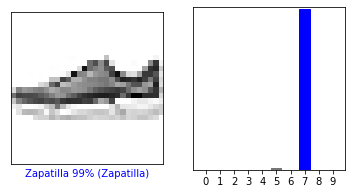

In [95]:
# Predicciones y pintar las 10 primeras prendas del segundo modelo
for i in range(10):
  print("Predicción ", i+1, ":")
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions21[i], test_labels0, test_images0)
  plt.subplot(1,2,2)
  plot_value_array(i, predictions21[i], test_labels0)
  plt.show()

## Caso 3:

Predicción  1 :


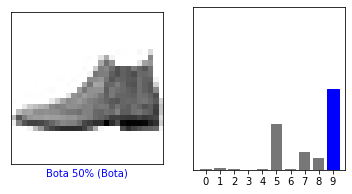

Predicción  2 :


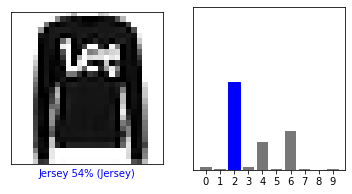

Predicción  3 :


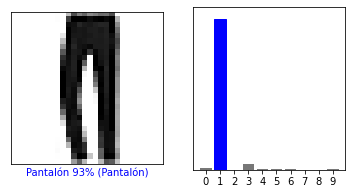

Predicción  4 :


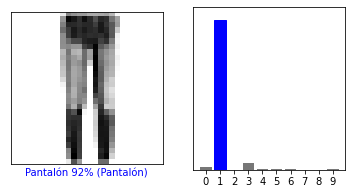

Predicción  5 :


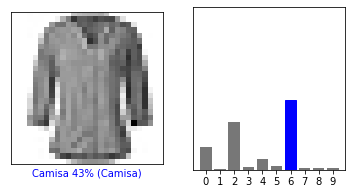

Predicción  6 :


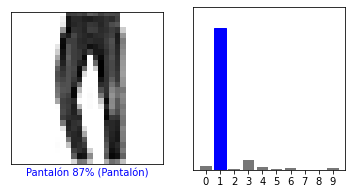

Predicción  7 :


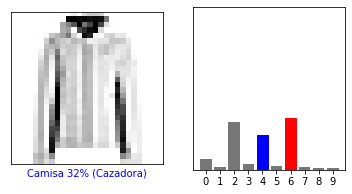

Predicción  8 :


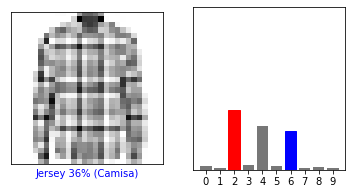

Predicción  9 :


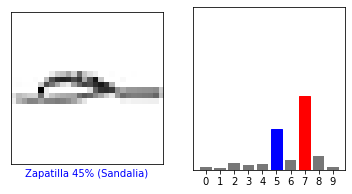

Predicción  10 :


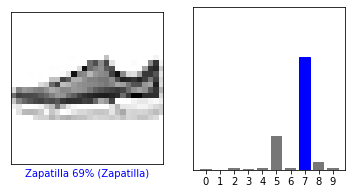

In [96]:
# Predicciones y pintar las 10 primeras prendas del tercer modelo
for i in range(10):
  print("Predicción ", i+1, ":")
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions31[i], test_labels0, test_images0)
  plt.subplot(1,2,2)
  plot_value_array(i, predictions31[i], test_labels0)
  plt.show()

## Caso 4:

Predicción  1 :


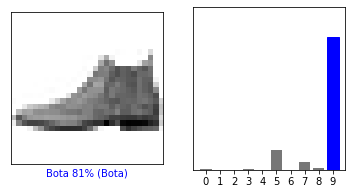

Predicción  2 :


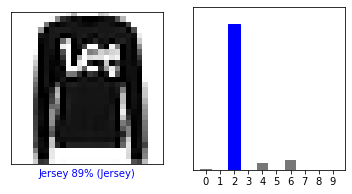

Predicción  3 :


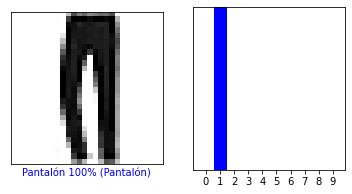

Predicción  4 :


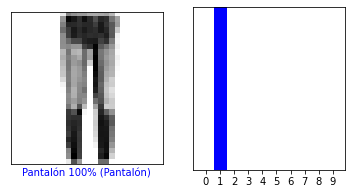

Predicción  5 :


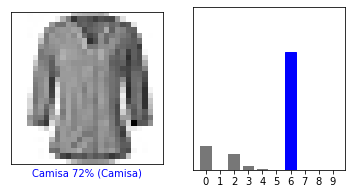

Predicción  6 :


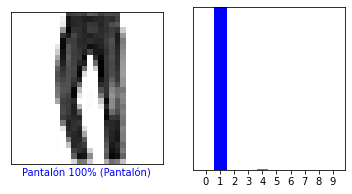

Predicción  7 :


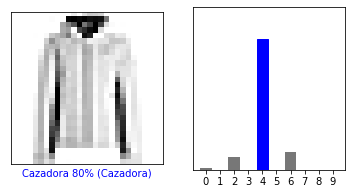

Predicción  8 :


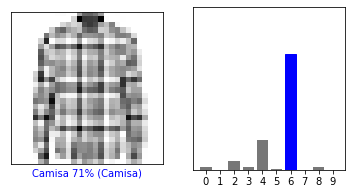

Predicción  9 :


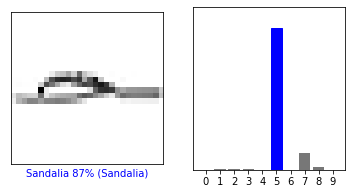

Predicción  10 :


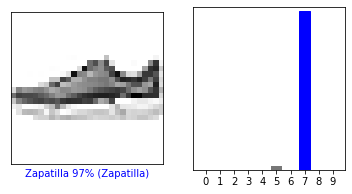

In [97]:
# Predicciones y pintar las 10 primeras prendas del cuarto modelo
for i in range(10):
  print("Predicción ", i+1, ":")
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions4[i], test_labels0, test_images0)
  plt.subplot(1,2,2)
  plot_value_array(i, predictions4[i], test_labels0)
  plt.show()

## Caso 5:

Predicción  1 :


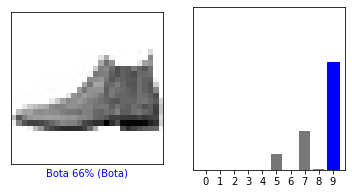

Predicción  2 :


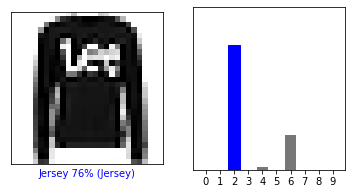

Predicción  3 :


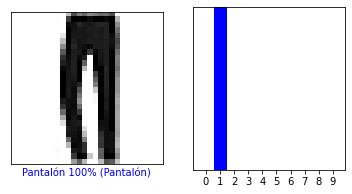

Predicción  4 :


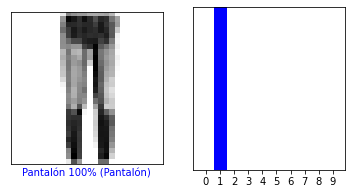

Predicción  5 :


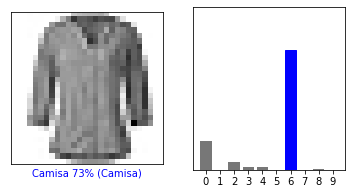

Predicción  6 :


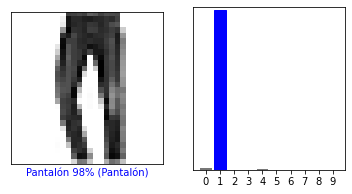

Predicción  7 :


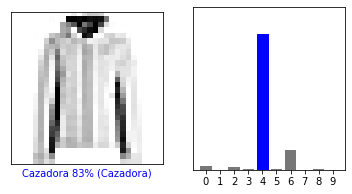

Predicción  8 :


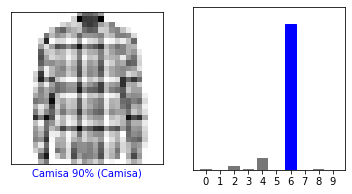

Predicción  9 :


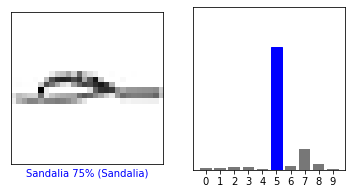

Predicción  10 :


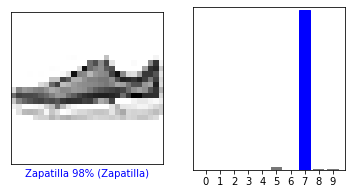

In [98]:
# Predicciones y pintar las 10 primeras prendas del quinto modelo
for i in range(10):
  print("Predicción ", i+1, ":")
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions5[i], test_labels0, test_images0)
  plt.subplot(1,2,2)
  plot_value_array(i, predictions5[i], test_labels0)
  plt.show()

## Caso 6:

Predicción  1 :


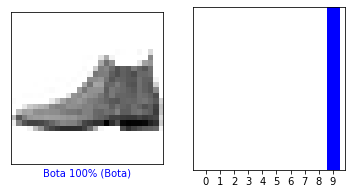

Predicción  2 :


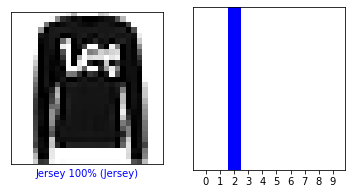

Predicción  3 :


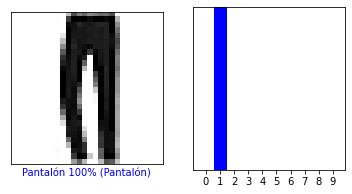

Predicción  4 :


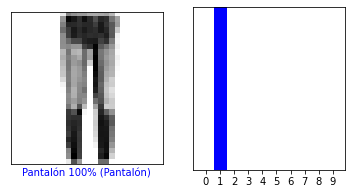

Predicción  5 :


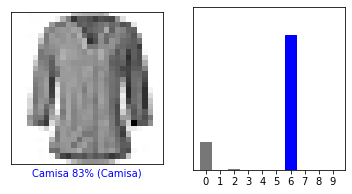

Predicción  6 :


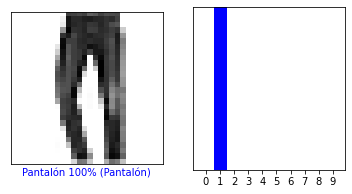

Predicción  7 :


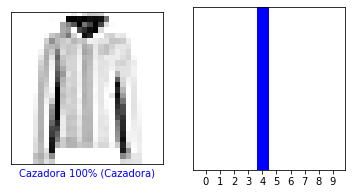

Predicción  8 :


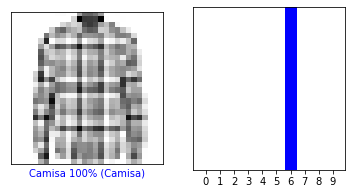

Predicción  9 :


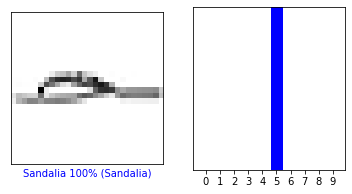

Predicción  10 :


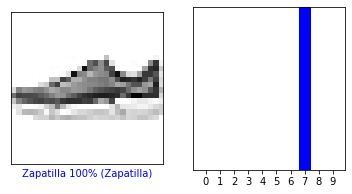

In [99]:
# Predicciones y pintar las 10 primeras prendas del sexto modelo
for i in range(10):
  print("Predicción ", i+1, ":")
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions6[i], test_labels0, test_images0)
  plt.subplot(1,2,2)
  plot_value_array(i, predictions6[i], test_labels0)
  plt.show()

## Caso 7:

Predicción  1 :


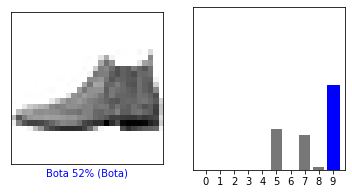

Predicción  2 :


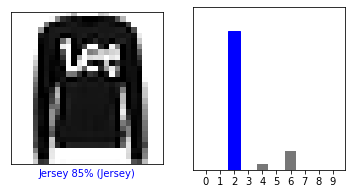

Predicción  3 :


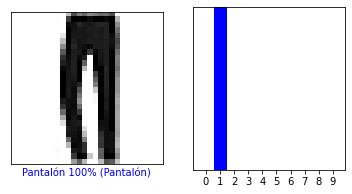

Predicción  4 :


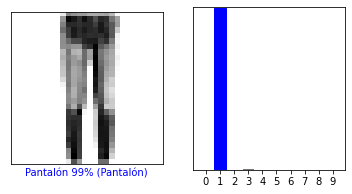

Predicción  5 :


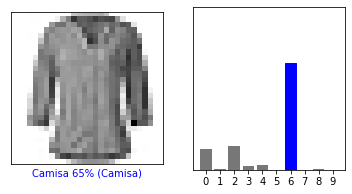

Predicción  6 :


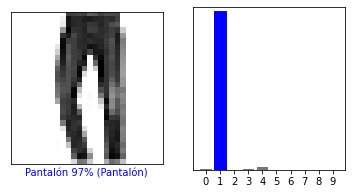

Predicción  7 :


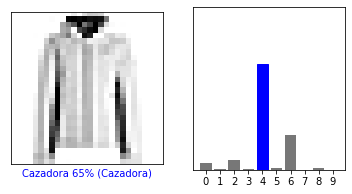

Predicción  8 :


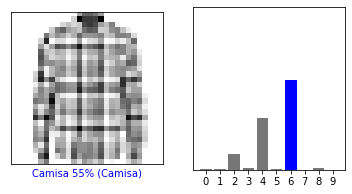

Predicción  9 :


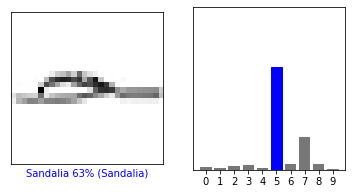

Predicción  10 :


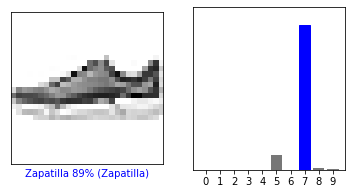

In [100]:
# Predicciones y pintar las 10 primeras prendas del séptimo modelo
for i in range(10):
  print("Predicción ", i+1, ":")
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions71[i], test_labels0, test_images0)
  plt.subplot(1,2,2)
  plot_value_array(i, predictions71[i], test_labels0)
  plt.show()

## Caso 8:

Predicción  1 :


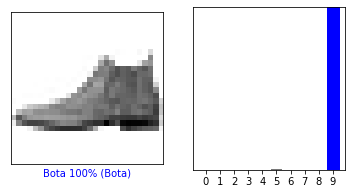

Predicción  2 :


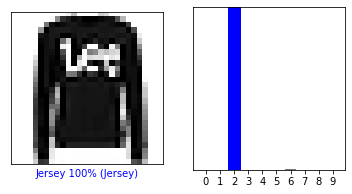

Predicción  3 :


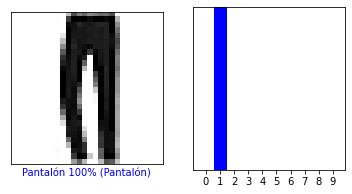

Predicción  4 :


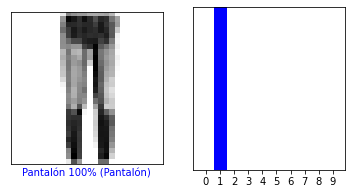

Predicción  5 :


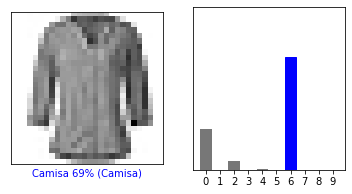

Predicción  6 :


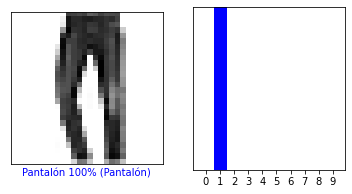

Predicción  7 :


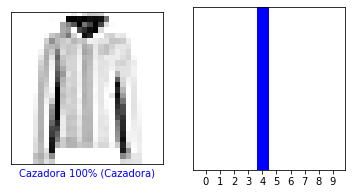

Predicción  8 :


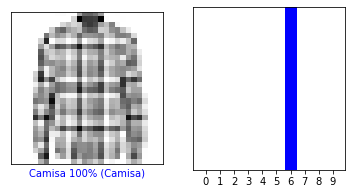

Predicción  9 :


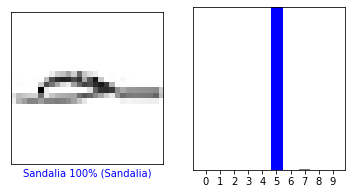

Predicción  10 :


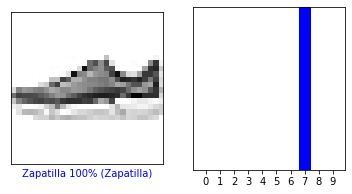

In [101]:
# Predicciones y pintar las 10 primeras prendas del octavo modelo
for i in range(10):
  print("Predicción ", i+1, ":")
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions8[i], test_labels0, test_images0)
  plt.subplot(1,2,2)
  plot_value_array(i, predictions8[i], test_labels0)
  plt.show()

# APARTADO 7. ADAM Y SPARSE_CATEGORICAL_CROSSENTROPY:

El objetivo del entrenamiento es minimizar el coste calculando los pesos ideales para la red de neuronas. El optimizador es quien se encarga de generar pesos cada vez mejores.

Para este modelo se usa el optimizador adam. Este optimizador es una combinación de otros dos (AdaGrad y RMSProp) y consiste en lo siguiente: se mantiene un factor de entrenamiento por parámetro, como se hace en AdaGrad, y a parte de calcular otro factor por RMSProp, cada factor de entrenamiento se ve afectado por la media del momento del gradiente.

Además, usaremos la función de pérdida sparse_categorical_crossentropy. Las funciones de pérdida se encargan de comprobar y evaluar las predicciones de la red con los valores de verdad. Lo que se busca en una red neuronal es que este valor sea el menor posible. Con esta función no tenemos que transformar los datos de las etiquetas para poder calcular la pérdida.

Ahora realizaremos todo el proceso para poder ver si mejora en comparación con el original.

## Creamos red neuronal

In [102]:
# Creamos la red de neuronas.
network32 = models.Sequential(name='Modelo_Zalando')
network32.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,), name='Neurona1'))
network32.add(layers.Dense(10, activation='softmax', name='Neurona2'),)

Ahora realizamos los cambios:

In [103]:
# HACEMOS EL PASO DE COMPILACIÓN CARGANDO EL OPTIMIZADOR, LA FUNCIÓN DE PÉRDIDA Y LAS MÉTRICAS
network32.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

Y entrenamos

In [104]:
# Entrenamiento del modelo con adam y sparse
modelo32 = network32.fit(train_images, train_labels0, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 1.4036 - accuracy: 0.6235
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.8654 - accuracy: 0.7653
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.6815 - accuracy: 0.7915
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.5881 - accuracy: 0.8140
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.5315 - accuracy: 0.8296


Y predecimos

In [105]:
# Predicción con adam y sparse
predictions32 = network32.predict(test_images)

313/313 [==============================] - 0s 1ms/step


## Evaluamos

Ahora lo evaluamos y lo comparamos con el caso 3 original.

In [106]:
# VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS (CON ADAM Y SPARSE)
test_loss32, test_acc32 = network32.evaluate(test_images, test_labels0)

313/313 [==============================] - 1s 2ms/step - loss: 0.5366 - accuracy: 0.8225


In [107]:
# Evaluamos la precisión y la pérdida
print('Precisión del test 3.1:', test_acc31)
print('Pérdida del test 3.1:', test_loss31)
print()
print('Precisión del test 3.2:', test_acc32)
print('Pérdida del test 3.2:', test_loss32)

Precisión del test 3.1: 0.7329000234603882
Pérdida del test 3.1: 0.7902593016624451

Precisión del test 3.2: 0.8224999904632568
Pérdida del test 3.2: 0.5365849137306213


Como podemos ver, al haber usado adam y sparse en el segundo modelo, ha mejorado notablemente tanto la precisión como la reducción de la pérdida. Esto es muy bueno para poder detectar las imágenes que haremos a continuación.

Aunque si que es cierto que no iguala a los modelos con 512 neuronas en la primera capa (pero se acerca)

Pero primero comprobaremos la matriz de confusión, aunque nos podemos hacer una idea de cómo van a ser teniendo en cuenta la mejoría sobre el primer modelo.

313/313 [==============================] - 0s 1ms/step


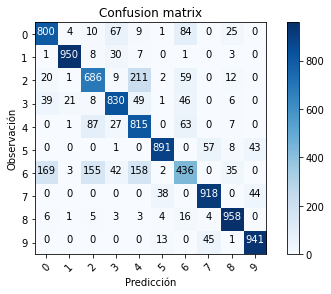

In [108]:
# Predecimos los valores y los convertimos para encajarlo en la matriz de confusion
Y_pred32 = network32.predict(test_images) 
Y_pred_classes32 = np.argmax(Y_pred32, axis = 1) 
Y_true32 = np.argmax(test_labels, axis = 1) 
# Computamos la matriz de confusion con las predicciones y los valores reales
confusion_mtx32 = confusion_matrix(Y_true32, Y_pred_classes32) 
# Pintamos la matriz de confusión
plot_confusion_matrix(confusion_mtx32, classes = range(10))

Al analizar ambas matrices, claramente una nos muestra más aciertos que la otra. En esta segunda matriz, vemos que con las camisas sigue sin haber acertado la mitad de ellas, pero podemos ver la gran mejoría que ha habido (se puede dar por hecho que esto tiene que ver con la función de activación como se ha dicho antes).

Respecto al resto de prendas, también ha habido una gran mejoría que ayudará a la hora de predecir.

## Predecir 6º imagen

Podemos ver como predice la sexta imagen y como responde ante elapartado 6 para ver la mejoría:

In [109]:
# Predicción del segundo modelo
print('Predicción del modelo 3.2:', class_names[np.argmax(predictions32[5])])
print("Valor real:",class_names[np.argmax(test_labels[5])])

Predicción del modelo 3.2: Pantalón
Valor real: Pantalón


## Pintar 10 primeras imágenes y ver resultado

Predicción  1 :


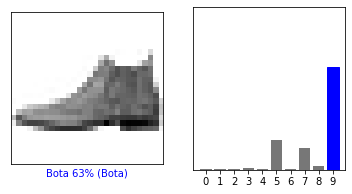

Predicción  2 :


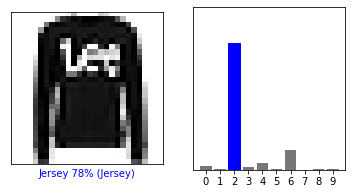

Predicción  3 :


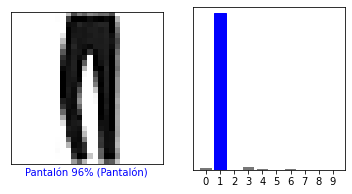

Predicción  4 :


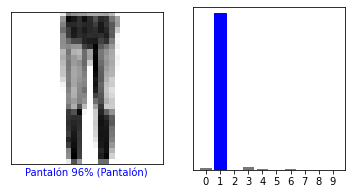

Predicción  5 :


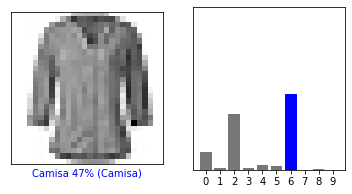

Predicción  6 :


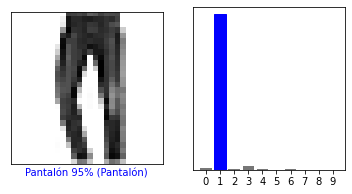

Predicción  7 :


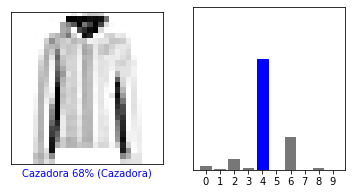

Predicción  8 :


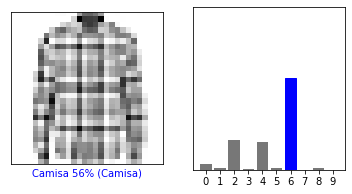

Predicción  9 :


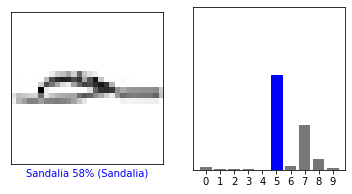

Predicción  10 :


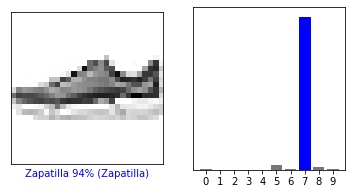

In [110]:
# Predicciones y pintar las 10 primeras prendas del tercer modelo CON ADAM Y SPARSE
for i in range(10):
  print("Predicción ", i+1, ":")
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions32[i], test_labels0, test_images0)
  plt.subplot(1,2,2)
  plot_value_array(i, predictions32[i], test_labels0)
  plt.show()

Podemos ver que hay otras prendas de ropa que también son problemáticas, como las sandalias. Esto parece que este modelo le vuesta reconocer. Y como hemos dicho anteriormente, los modelos de 512 neuronas son mejores que estos. Seguramente si utilizaramos adam y sparse en el modelo 5, puede que nos mejore bastante el modelo.

# CONCLUSIÓN FINAL

Al haber tenido tantos resultados distintos, hemos podido comprobar que hay que hacer pruebas (experimentar con el número de neuronas, las funciones de activación, etc) para poder obtener la red neuronal óptima.

Las opciones mas acertada en este tipo de red neuronal son los casos 5 y 6, al tener el mayor porcentaje de acierto, utlizando 512 neuronas en la segunda capa, función de activación relu y optimizadores sgd y rmsprop. (pero hemos visto que el optimizador rmsprop es mejor porque optimiza mejor los errores)



In [111]:
print(test_loss5)
print(test_loss6)

0.4459783732891083
0.4368915557861328


Además el caso 6 es el que menos pérdida tiene, por lo que de elegir uno, escogeriamos el 6